# Гипотезы и A/B тесты

## Введение

В интернет-магазине отдел аналитики вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Описание данных**

Данные для первой части:

Файл `/datasets/hypothesis.csv`
* `Hypothesis` — краткое описание гипотезы;
* `Reach` — охват пользователей по 10-балльной шкале;
* `Impact` — влияние на пользователей по 10-балльной шкале;
* `Confidence` — уверенность в гипотезе по 10-балльной шкале;
* `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение `Efforts`, тем дороже проверка гипотезы.

Данные для второй части:

Файл `/datasets/orders.csv`
* `transactionId` — идентификатор заказа;
* `visitorId` — идентификатор пользователя, совершившего заказ;
* `date` — дата, когда был совершён заказ;
* `revenue` — выручка заказа;
* `group` — группа A/B-теста, в которую попал заказ.

Файл `/datasets/visitors.csv`
* `date` — дата;
* `group` — группа A/B-теста;
* `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Часть 1. Приоретизация гипотез

###### Задачи

* Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
* Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Приоретизация гипотез с помощью фреймворка ICE

Для приоретизации гипотез с помощью фреймворка ICE используется следующая формула:

**ICE SCORE = (Impact * Confidence) / Efforts**

In [3]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


### Приоретизация гипотез с помощью фреймворка RICE

Для приоретизации гипотез с помощью фреймворка RICE используется следующая формула:

**ICE SCORE = (Reach * Impact * Confidence) / Efforts**

In [4]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


### Вывод

При приоретизации с помощью фреймворка ICE самыми приоритетными гипотезами оказались гипотезы с индексам 8, 0 и 7.
При приоретизации с помощью фреймворка RICE самыми приоритетными гипотезами оказались гипотезы с индексам 7, 2, 0 и 6.

Разница в приоритеных гипотезах обуславливается тем, что при испольовании фреймворка RICE учитывается параметр `Reach`, который указывает охват пользователей, на которых повлияет тестирование гипотезы.

На основе проведённых приоретизациях, можно утверждать, что в первую очередь необходимо проверить гипотезы с индексам 0 и 7.

## Часть 2. Анализ A/B теста

###### Задачи

Проанализировать A/B-тест:
* Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
* Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
* Построить график кумулятивной конверсии по группам. Сделать выводы и предположения.
* Построить график относительного изменения кумулятивной конверсии группы B к группе A. Сделать выводы и предположения.
* Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
* Построить точечный график стоимостей заказов. Сделать выводы и предположения.
* Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
* Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделать выводы и предположения.
* Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
* Принять решение по результатам теста и объяснить его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

In [5]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

print(orders.head(5))
print(visitors.head(5))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756


In [6]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [7]:
print('Чилсо дубликатов в таблице orders:', orders.duplicated().sum())
print('Число дубликатов в таблице visitors:', visitors.duplicated().sum())

Чилсо дубликатов в таблице orders: 0
Число дубликатов в таблице visitors: 0


Тип данных дат в обоих таблицах `object`. Необходимо привести его к типу `datetime`. Также я переименую некоторые столбцы в таблице `orders`. Дубликатов в таблицах не оказалось.

In [8]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

orders = orders.rename(columns={'transactionId':'transaction_id',
                               'visitorId':'visitor_id'})

In [9]:
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Даты приведены к нужному типу данных, столбца приведены к `snake_case`.

In [10]:
duplicated_users = orders.groupby('visitor_id', as_index=False).agg({'group':'nunique'})
duplicated_users.columns = ['visitor_id', 'group_cnt']
duplicated_users = duplicated_users[duplicated_users['group_cnt'] > 1]
len(duplicated_users)

58

В таблице orders оказалось 58 пользователей, которые входят в обе группы. Я думаю, будет лучше удалить их из теблицы.

In [11]:
orders = orders[np.logical_not(orders['visitor_id']
                               .isin(duplicated_users['visitor_id'])
                              )
               ]

### Подготовка данных к вычислениям

In [12]:
date_groups = orders[['date', 'group']].drop_duplicates()

In [13]:
orders_by_group = date_groups.apply(lambda x: orders[
                                                       np.logical_and(orders['date'] <= x['date'], 
                                                                      orders['group'] == x['group']
                                                                     )
                                                      ].agg({'date':'max',
                                                            'group':'max',
                                                            'transaction_id':'nunique',
                                                             'visitor_id':'nunique',
                                                            'revenue':'sum',
                                                            }
                                                           ), axis=1
                                     ).sort_values(by=['date', 'group'])

orders_by_group = orders_by_group.rename(columns={'transaction_id':'transactions',
                                                 'visitor_id':'buyers'})
orders_by_group.head(6)

,date,group,transactions,buyers,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
383,2019-08-03,B,54,53,288850


In [14]:
visitors_by_group = date_groups.apply(lambda x: visitors[
                                                        np.logical_and(visitors['date'] <= x['date'],
                                                                      visitors['group'] == x['group']
                                                                      )
                                                       ].agg({'date':'max',
                                                             'group':'max',
                                                             'visitors':'sum'
                                                             }
                                                            ), axis=1
                                    ).sort_values(by=['date', 'group'])

visitors_by_group.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
383,2019-08-03,B,1803


In [15]:
cumulative_data = orders_by_group.merge(visitors_by_group, 
                                        left_on=['date', 'group'], 
                                        right_on=['date', 'group'])

cumulative_data['conversion'] = cumulative_data['transactions'] / cumulative_data['visitors']
cumulative_data.head(6)

,date,group,transactions,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772
5,2019-08-03,B,54,53,288850,1803,0.029950


In [16]:
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

In [17]:
merged_cumulative_data = cumulative_data_a.merge(cumulative_data_b, 
                                                 left_on='date', 
                                                 right_on='date', 
                                                 suffixes=['_a', '_b'])

merged_cumulative_data.head(5)

,date,group_a,transactions_a,buyers_a,revenue_a,visitors_a,conversion_a,group_b,transactions_b,buyers_b,revenue_b,visitors_b,conversion_b
0,2019-08-01,A,23,19,142779,719,0.031989,B,17,17,59758,713,0.023843
1,2019-08-02,A,42,36,234381,1338,0.031390,B,40,39,221801,1294,0.030912
2,2019-08-03,A,66,60,346854,1845,0.035772,B,54,53,288850,1803,0.029950
3,2019-08-04,A,77,71,388030,2562,0.030055,B,68,66,385740,2573,0.026428
4,2019-08-05,A,99,92,474413,3318,0.029837,B,89,87,475648,3280,0.027134


### Построение графика кумулятивной выручки по группам

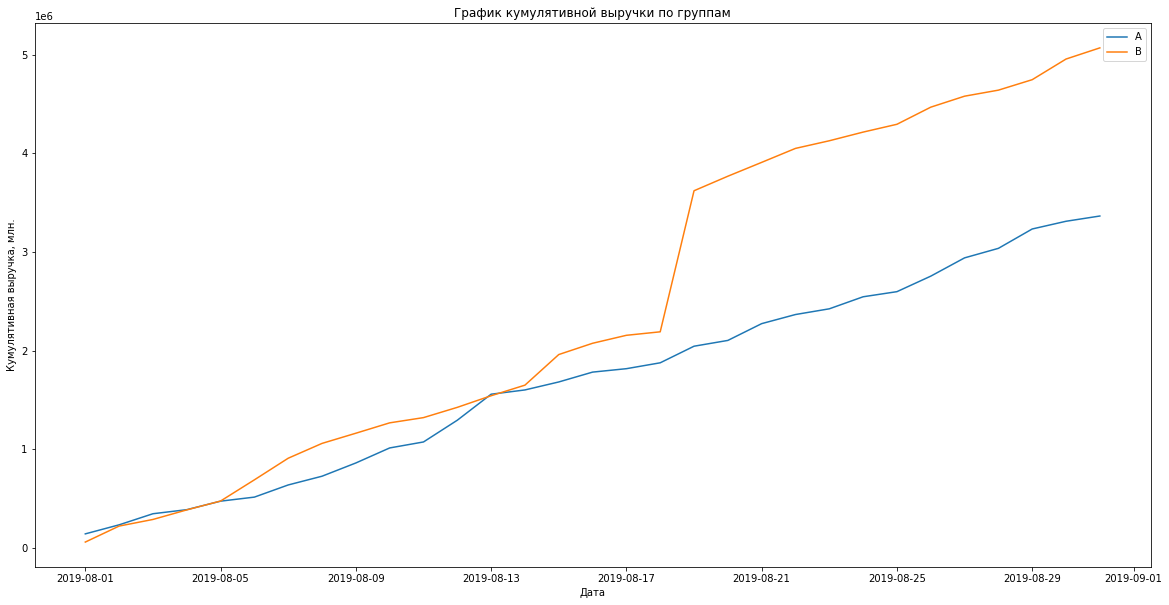

In [18]:
plt.figure(figsize=(20, 10))

plt.plot(merged_cumulative_data['date'], 
         merged_cumulative_data['revenue_a'], 
         label='A')

plt.plot(merged_cumulative_data['date'], 
         merged_cumulative_data['revenue_b'], 
         label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка, млн.')

plt.legend()

plt.show()

Согласно графикам, кумулятивная выручка в группе В явно выше, чем в группе А, однако на графике В есть резкий скачок в районе 19 августа, что может свидетельствовать об аномалиях в этой группе.

### Построение графика кумулятивного среднего чека по группам

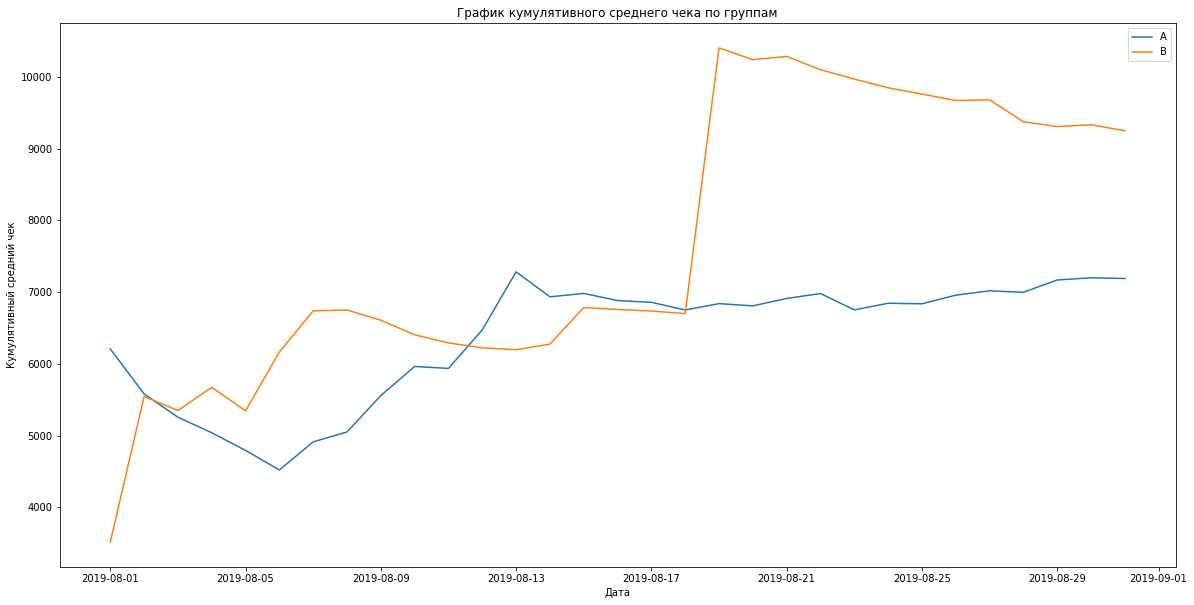

In [19]:
plt.figure(figsize=(20, 10))

plt.plot(merged_cumulative_data['date'], 
         merged_cumulative_data['revenue_a']/merged_cumulative_data['transactions_a'], 
         label='A')

plt.plot(merged_cumulative_data['date'], 
         merged_cumulative_data['revenue_b']/merged_cumulative_data['transactions_b'], 
         label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')

plt.legend()

plt.show()

Согласно графику, кумулятивный средний чек группы В выше, чем группы А, однако на графике В есть резкий скачок так же в районе 19 августа, что усиливает подозрения об аномалиях в этой группе.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

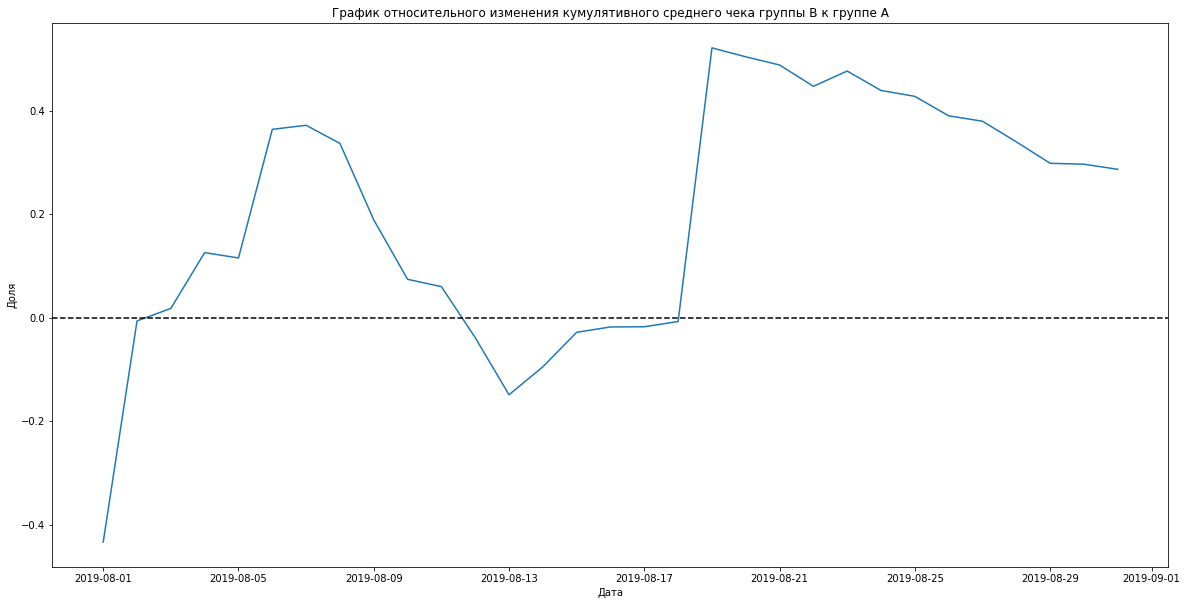

In [20]:
plt.figure(figsize=(20, 10))

plt.plot(merged_cumulative_data['date'], 
         (
             (merged_cumulative_data['revenue_b']/merged_cumulative_data['transactions_b'])
             / (merged_cumulative_data['revenue_a']/merged_cumulative_data['transactions_a']) 
             - 1
         )
        )

plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля')

plt.show()

График показывает, что кумулятивный чек группы В стабильно выше относительного кумулятивного чека группы А, что говорит о том, что пользователи группы В тратят больше денег, чем пользователи группы А. Скачки на графике говорят о том, что в данных есть аномалии.

### Построение графика кумулятивной конверсии заказов по группам

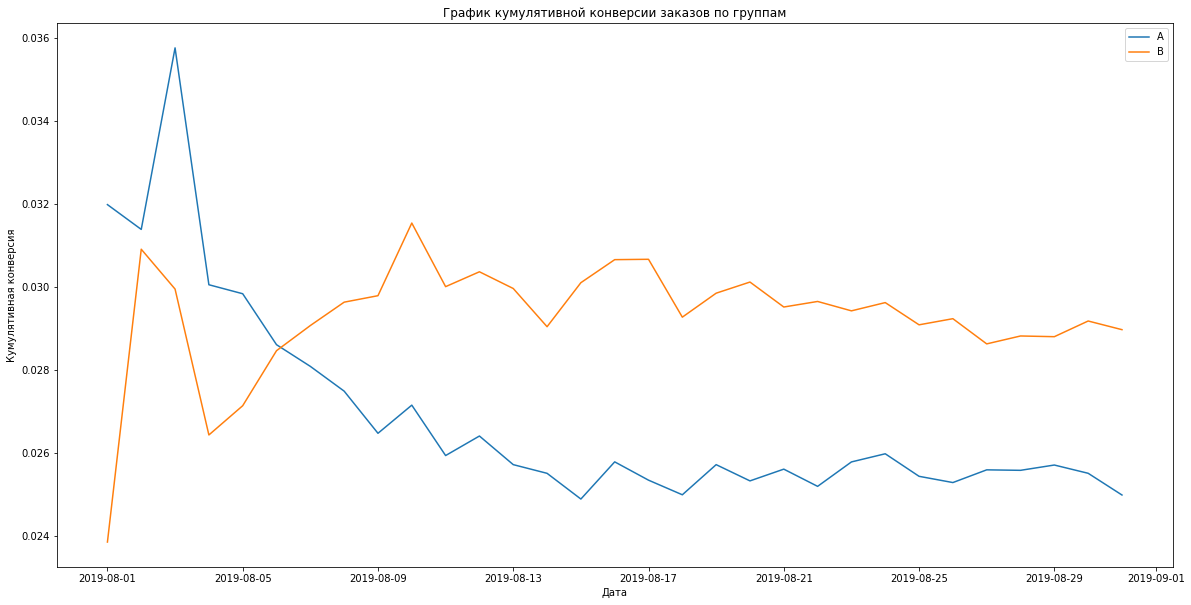

In [21]:
plt.figure(figsize=(20, 10))

plt.plot(merged_cumulative_data['date'],
        merged_cumulative_data['conversion_a'],
        label='A')

plt.plot(merged_cumulative_data['date'],
        merged_cumulative_data['conversion_b'],
        label='B')

plt.title('График кумулятивной конверсии заказов по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')

plt.legend()

plt.show()

Графики показывают, что кумулятивная конверсия заказов в группе В мало отличается от кумулятивной конверсии заказов в группе А. Есть небольшая разница между ними, но это доли процента.

### Построение графика относительного изменения кумулятивной конверсии заказов группы B к группе A

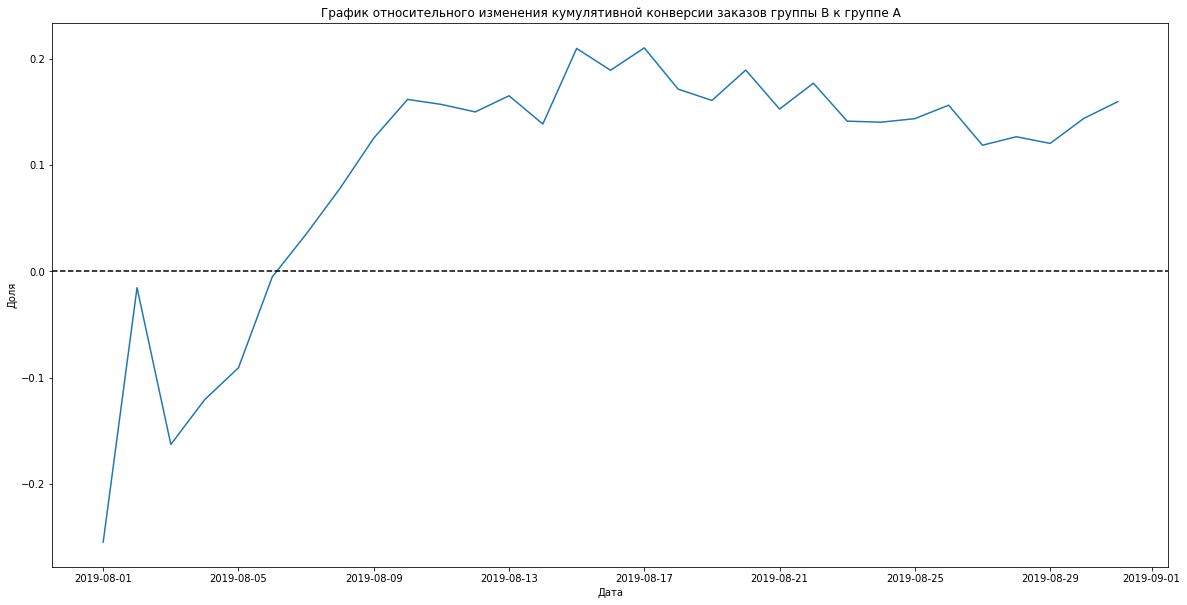

In [22]:
plt.figure(figsize=(20, 10))

plt.plot(merged_cumulative_data['date'],
        merged_cumulative_data['conversion_b'] / merged_cumulative_data['conversion_a'] - 1)

plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивной конверсии заказов группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля')

plt.show()

Хотя и графики кумулятивной конверсии заказов по группам показали незначительную разницу между конверсиями групп, на графике относительного изменения кумулятивной конверсии заказов группы B к группе A видно, что конверсия группы В стабильно лучше конверсии группы А на 10%.

### Построение точечного графика количества заказов по пользователям

In [23]:
orders_by_users = (orders.groupby('visitor_id', as_index=False)
                   .agg({'group':'max',
                         'transaction_id':'nunique'})
                   .rename(columns={'transaction_id':'transactions'})
                  )

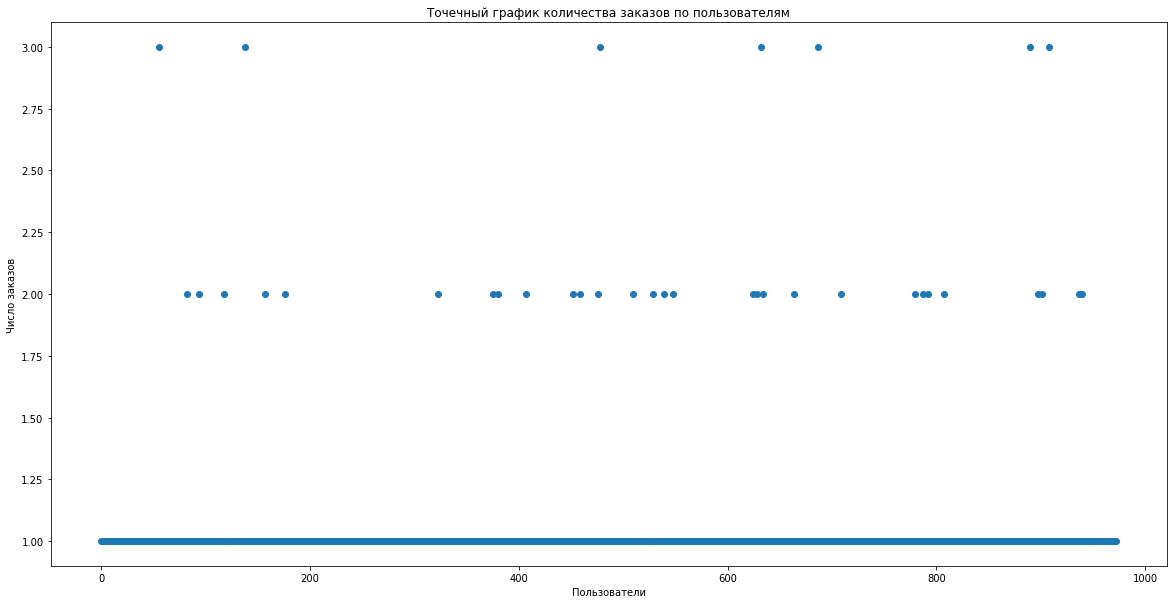

In [24]:
plt.figure(figsize=(20, 10))

plt.scatter(range(0, len(orders_by_users)), orders_by_users['transactions'])

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Число заказов')

plt.show()

На точечном графике количества заказов явно видно что пользователи в основном делают от 1 до 2 заказов.

### Вычисление 95-й и 99-й перцентили количества заказов на пользователя

In [25]:
np.percentile(orders_by_users['transactions'], [95, 99])

array([1., 2.])

Лишь 5% пользователей делают более одного заказов, и только 1% пользователей делают более двух. Следовательно границу для количества аномальных заказов нужно принять за 1 заказ.

In [26]:
border_order = np.percentile(orders_by_users['transactions'], [95, 99])[0]

### Построение точечного графика стоимостей заказов

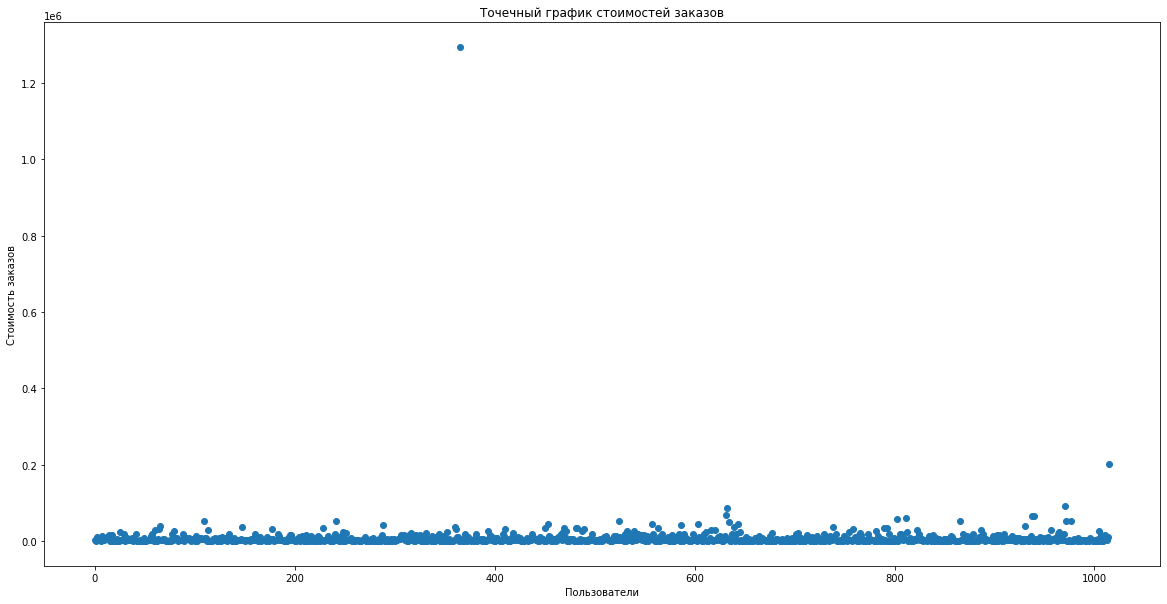

In [27]:
plt.figure(figsize=(20, 10))

plt.scatter(range(0, len(orders)), orders['revenue'])

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

plt.show()

На графике явно видно аномальный заказ стоимостью 1.3 млн., однако большинство заказов явно меньше 50 тыс.

### Вычисление 95-й и 99-й перцентили стоимости заказов

In [28]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Лишь 5% заказов превышают стоимость 26785, и только 1% заказов дороже 53904. Следовательно границу для цены аномальных заказов нужно принять за 26785.

In [29]:
border_revenue = np.percentile(orders['revenue'], [95, 99])[0]

### Подготовка данных для вычислений статистической значимости различий

In [30]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date':'max', 'visitors_per_date_a':'sum'}),
    axis=1)

visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

In [31]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date':'max', 'visitors_per_date_b':'sum'}),
    axis=1)

visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

In [32]:
orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':'nunique', 'revenue':'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a':'sum', 'revenue_per_date_a':'sum'}),
    axis=1).sort_values(by=['date'])

orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

In [33]:
orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':'nunique', 'revenue':'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date':'max', 'orders_per_date_b':'sum', 'revenue_per_date_b':'sum'}),
    axis=1).sort_values(by=['date'])

orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

In [34]:
data = (
    visitors_a_daily
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_a_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  visitors_per_date_a  visitors_cummulative_a  \
0 2019-08-01                  719                     719   
1 2019-08-02                  619                    1338   
2 2019-08-03                  507                    1845   
3 2019-08-04                  717                    2562   
4 2019-08-05                  756                    3318   

   visitors_per_date_b  visitors_cummulative_b  orders_per_date_a  \
0                  713                     713                 23   
1                  581                    1294                 19   
2                  509                    1803                 24   
3                  770                    2573                 11   
4                  707                    3280                 22   

   revenue_per_date_a  orders_cummulative_a  revenue_cummulative_a  \
0              142779                    23                 142779   
1               91602                    42                 234381   
2       

In [35]:
total_visitors_a = visitors[visitors['group'] == 'A']['visitors'].sum()
total_visitors_b = visitors[visitors['group'] == 'B']['visitors'].sum()

### Вычисление статистической значимости различий в среднем количестве заказов между группами по «сырым» данным

**H0**: Нет статистически значимых различий в среднем числе заказов между группами по «сырым» данным.

**H1**: Есть статистически значимые различия в среднем числе заказов между группами по «сырым» данным.

In [36]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)
orders_by_users_b.columns = ['user_id', 'orders'] 

In [37]:
sample_a = pd.concat( 
                     [orders_by_users_a['orders'], 
                      pd.Series(0,   
                                index=(np.arange(total_visitors_a   #Старый код: visitors[visitors['group']=='A']['visitors'].sum() 
                                                 - len(orders_by_users_a['orders'])
                                                )
                                      ), 
                                name='orders')
                     ], axis=0).reset_index(drop=True)

sample_b = pd.concat( 
                     [orders_by_users_b['orders'], 
                      pd.Series(0, 
                                index=(np.arange(total_visitors_b #visitors[visitors['group']=='B']['visitors'].sum() 
                                                 - len(orders_by_users_b['orders'])
                                                )
                                      ), 
                                name='orders')
                     ], axis=0).reset_index(drop=True)

In [38]:
print("p-value: {0:.3f}"
      .format(st.mannwhitneyu(sample_a, sample_b)[1]))
print("Разница между группами составляет {0:.1f}% в пользу группы В"
      .format((sample_b.mean() / sample_a.mean() - 1)*100))

if st.mannwhitneyu(sample_a, sample_b)[1] < 0.05:
    print('Есть статистически значимые различия в среднем числе заказов между группами по «сырым» данным.')
else:
    print('Нет статистически значимых различий в среднем числе заказов между группами по «сырым» данным.')

p-value: 0.011
Разница между группами составляет 16.0% в пользу группы В
Есть статистически значимые различия в среднем числе заказов между группами по «сырым» данным.


### Вычисление статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

**H0**: Нет статистически значимых различий в среднем чеке заказа между группами по «сырым» данным.

**H1**: Есть статистически значимые различия в среднем чеке заказа между группами по «сырым» данным.

In [39]:
print('p-value: {0:.3f}'
      .format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Разница между группами составляет {0:.1f}% в пользу группы В'
      .format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)*100)) 

if st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < 0.05:
    print('Есть статистически значимые различия в среднем чеке заказа между группами по «сырым» данным.')
else:
    print('Нет статистически значимых различий в среднем чеке заказа между группами по «сырым» данным.')

p-value: 0.829
Разница между группами составляет 28.7% в пользу группы В
Нет статистически значимых различий в среднем чеке заказа между группами по «сырым» данным.


### Вычисление статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным

**H0**: Нет статистически значимых различий в среднем количестве заказов между группами по «очищенным» данным.

**H1**: Есть статистически значимые различия в среднем количестве заказов между группами по «очищенным» данным.

In [40]:
users_with_many_orders = pd.concat(
                                   [orders_by_users_a[orders_by_users_a['orders'] > border_order]['user_id'],
                                    orders_by_users_b[orders_by_users_b['orders'] > border_order]['user_id']
                                   ], axis=0)

users_with_expensive_orders = orders[orders['revenue'] > border_revenue]['visitor_id']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [41]:
sample_a_filtered = pd.concat(
    [orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]['orders'], 
     pd.Series(0, 
               #Старый код: index=np.arange(data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),
               index=np.arange(total_visitors_a - len(orders_by_users_a['orders'])),
               name='orders'
              )
    ], axis=0)

sample_b_filtered = pd.concat(
    [orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]['orders'], 
     pd.Series(0,
               # старый код: index=np.arange(data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), 
               index=np.arange(total_visitors_b - len(orders_by_users_b['orders'])), 
               name='orders')
    ], axis=0)

In [42]:
print('p-value: {0:.3f}'
      .format(st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Разница между группами составляет {0:.1f}% в пользу группы В'
      .format((sample_b_filtered.mean()/sample_a_filtered.mean()-1)*100)) 

if st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] < 0.05:
    print('Есть статистически значимые различия в среднем количестве заказов между группами по «очищенным» данным.')
else:
    print('Нет статистически значимых различий в среднем количестве заказов между группами по «очищенным» данным.')

p-value: 0.016
Разница между группами составляет 17.4% в пользу группы В
Есть статистически значимые различия в среднем количестве заказов между группами по «очищенным» данным.


### Вычисление статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

**H0**: Нет статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным.

**H1**: Есть статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным.

In [43]:
print('p-value: {0:.3f}'
      .format(st.mannwhitneyu(orders
                              [np.logical_and(orders['group'] == 'A', 
                                              np.logical_not(orders['visitor_id'].isin(abnormal_users))
                                             )
                              ]['revenue'],
                              orders
                              [np.logical_and(orders['group'] == 'B',
                                              np.logical_not(orders['visitor_id'].isin(abnormal_users))
                                             )
                              ]['revenue']
                             )
              [1])
     )


print("Разница между группами составляет {0:.1f}% в пользу группы В"
      .format((orders
              [np.logical_and(orders['group'] == 'B',
                              np.logical_not(orders['visitor_id'].isin(abnormal_users))
                             )
              ]['revenue'].mean()
              / 
              orders
              [np.logical_and(orders['group'] == 'A',
                              np.logical_not(orders['visitor_id'].isin(abnormal_users))
                              )
              ]['revenue'].mean()
              - 1) * 100)
     ) 

if (st.mannwhitneyu(orders
                              [np.logical_and(orders['group'] == 'A', 
                                              np.logical_not(orders['visitor_id'].isin(abnormal_users))
                                             )
                              ]['revenue'],
                              orders
                              [np.logical_and(orders['group'] == 'B',
                                              np.logical_not(orders['visitor_id'].isin(abnormal_users))
                                             )
                              ]['revenue']
                             )
              [1] < 0.05):
    print('Есть статистически значимые различия в среднем чеке заказа между группами по «очищенным» данным.')
else:
    print('Нет статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным.')

p-value: 0.727
Разница между группами составляет -3.4% в пользу группы В
Нет статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным.


### Принятие решения по результатам теста

По результатам проведённого теста можно утверждать:
* Есть статистическая разница по количеству заказов между группами, как по "сырым", так и по "очищенным" данным. Следовательно, пользователи стали чаще делать заказы. 
* Статистической разницы по среднему чеку между группами нет, как по "сырым", так и по "очищенным" данным. Разница между сегментами практически исчезла. На это повлияла отчистка от аномальных данных. Следовательно, средний чек заказа не изменился.
* Согласно графику различия конверсии между группами результаты группы B лучше группы A. Конверсия группы В стабильно выше на 10%.

На основе полученных выводов можно остановить A/B тест. Тест прошел успешно, группа B делает больше заказов, чем группа А.